# ANSCOMBE QUARTET
Ejercicio 0 de Aprendizaje de maquina

En principio este ejercicio muestra como conjuntos de datos con propiedades estadísticas similares pueden de hecho ser muy diferentes entre sí.

In [28]:
import pandas as pd # libreria manipulacion de datos
import seaborn as sns # Libreria graficas
import numpy as np

In [29]:
#Cargo los datos
anscombe = pd.read_csv('https://github.com/mwaskom/seaborn-data/raw/master/anscombe.csv')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [30]:
agg = anscombe.groupby('dataset').agg([np.mean, np.var])
agg

x               y          
        mean   var      mean       var
dataset                               
I        9.0  11.0  7.500909  4.127269
II       9.0  11.0  7.500909  4.127629
III      9.0  11.0  7.500000  4.122620
IV       9.0  11.0  7.500909  4.123249

In [31]:
# Calcular la correlacion
corr = [g.corr()['x'][1] for _, g in anscombe.groupby('dataset')]
corr


[0.8164205163448399,
 0.8162365060002427,
 0.8162867394895984,
 0.8165214368885028]

## Graficar los datasets, haciendo un scatterplot y una regression lineal

In [35]:
# Grafica Usando seaborn
sns.set(style="ticks")
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
               col_wrap=2, ci=None, palette="muted", height=4,
               scatter_kws={"s": 50, "alpha": 1});

In [36]:
fits = [np.polyfit(g['x'], g['y'], 1) for _, g in anscombe.groupby('dataset')]


In [37]:
# Almacenar los valores calculados de las regresiones lineales en un dataframe
val_reg = pd.DataFrame(fits,columns=['pendiente','intercepto'],index='I II II IV'.split())
val_reg.index.names = ['dataset']
val_reg


,pendiente,intercepto
dataset,,
I,0.500091,3.000091
II,0.500000,3.000909
II,0.499727,3.002455
IV,0.499909,3.001727


In [3]:

anscombe_df = sns.load_dataset("anscombe") # load anscombe dataset from seaborn
anscombe_df['x'] = anscombe_df['x'].astype(float)
anscombe_df['y'] = anscombe_df['y'].astype(float)
anscombe_df   

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


# Datavis 

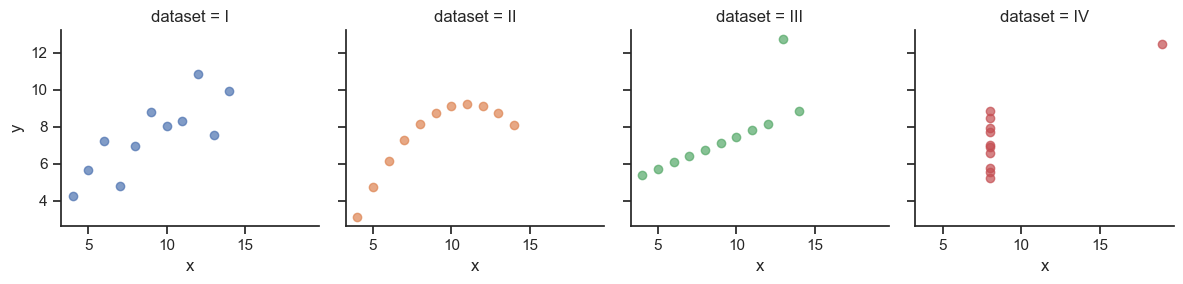

In [4]:
import matplotlib.pyplot as plt  # import pyplot to create scatter plots
sns.set(style="ticks")

g = sns.FacetGrid(anscombe_df, col="dataset", hue="dataset") # define a grid of plots
g.map(plt.scatter, "x", "y", alpha=.7)                      # render scatterplots

# Verificar los parametros del dataset

In [11]:
anscombe_dataset_labels = anscombe_df['dataset'] # labels for each dataset


In [13]:
# Media
anscombe_mean_of_xy = {q: anscombe_df[anscombe_df['dataset'] == q].mean() for q in anscombe_dataset_labels}

/var/folders/xg/mspltf89533_lq7nmv11w1fw0000gn/T/ipykernel_3871/360135387.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  anscombe_mean_of_xy = {q: anscombe_df[anscombe_df['dataset'] == q].mean() for q in anscombe_dataset_labels}


In [14]:
# Varianza
anscombe_var_of_xy  = {q: anscombe_df[anscombe_df['dataset'] == q].var() for q in anscombe_dataset_labels}

# Correlacion entre x e y
anscombe_corr_of_xy = {q: anscombe_df[anscombe_df['dataset'] == q]['x'].corr(anscombe_df[anscombe_df['dataset'] == q]['y']) for q in anscombe_dataset_labels}


/var/folders/xg/mspltf89533_lq7nmv11w1fw0000gn/T/ipykernel_3871/2348985735.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  anscombe_var_of_xy  = {q: anscombe_df[anscombe_df['dataset'] == q].var() for q in anscombe_dataset_labels}


In [17]:
# Anscombe quartet statistics
pd.concat([pd.DataFrame.from_dict(anscombe_mean_of_xy).rename({"x": "Media de x", "y": "Media de y"}),
           pd.DataFrame.from_dict(anscombe_var_of_xy).rename({"x": "Varianza de x", "y": "Varianza de y"}),
           pd.DataFrame({k: [v] for k, v in anscombe_corr_of_xy.items()}).rename({0: "Correlacion de x e y"})])\
          .style.set_precision(3).set_caption("Anscombe's quartet statistics")

/var/folders/xg/mspltf89533_lq7nmv11w1fw0000gn/T/ipykernel_3871/4154376120.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pd.concat([pd.DataFrame.from_dict(anscombe_mean_of_xy).rename({"x": "Media de x", "y": "Media de y"}),


,I,II,III,IV
Media de x,9.000,9.000,9.000,9.000
Media de y,7.501,7.501,7.500,7.501
Varianza de x,11.000,11.000,11.000,11.000
Varianza de y,4.127,4.128,4.123,4.123
Correlacion de x e y,0.816,0.816,0.816,0.817
